# Lab Rotation - Nuno Martinho (8)

In [113]:
# Inputs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools, Draw
from rdkit.Chem.Draw import IPythonConsole
from __future__ import print_function
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm
from rdkit.Chem import rdFMCS
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image
from IPython.display import display
import IPython.display
from PIL import Image
from rdkit import DataStructs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import molvs
from molvs import Standardizer
from molvs import fragment
from molvs import charge
from molvs import tautomer
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric, GetScaffoldForMol
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.rdinchi import InchiToInchiKey, MolToInchi
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdFMCS
from rdkit.Chem.Draw import DrawingOptions
from IPython.display import SVG
from rdkit.Chem.PandasTools import AddMoleculeColumnToFrame
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

### Maximum Common Substructure (MCS)

In [3]:
# Upload information of my dataset

Dataset = pd.read_csv("Database_curated_WithMorgan.csv")

In [4]:
Dataset

,Name,Structure,SMILES,IC50 (µM),Active/Inactive,InChIKeys,Standardized SMILES,Morgan Fingerprints
0,1,Imagem,C[C@@H](C1=CC=C2C=C(C=CC2=C1)OC)C(=O)N[C@@H](C...,20.7,1.0,ATRZWHYIEWLEMV-HZTQYWCDSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)[C@@H](C)...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
1,a1,Imagem,CC(C)C(=O)N[C@@H](CC1=CSC=C1)C(=O)NC(C2=CC=C(C...,>50,0.0,GOKAEQAWUMBNSK-ZZHFZYNASA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)C(C)C)c2c...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
2,a2,Imagem,CC(=O)OC1=CC=C(C=C1)C(=O)N[C@@H](CC2=CSC=C2)C(...,>50,0.0,AXWTXKBKCWHMOR-NPHAVVRNSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2ccc(OC(...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
3,a3,Imagem,COC1=CC=C(C(=C1)OC)C(C2=CC=C(C=C2)OCC(=O)O)NC(...,>50,0.0,NYFJPMRNXTZLCI-QUWDGAPNSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2c[nH]c3...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
4,a4,Imagem,CN1CCN(CC1)CC2=CC=C(C=C2)C(=O)N[C@@H](CC3=CSC=...,>50,0.0,WDZKAQRZFFAFMW-GYXLRUHFSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2ccc(CN3...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
5,a5,Imagem,COC1=CC=C(C=C1)C2CC2C(=O)N[C@@H](CC3=CSC=C3)C(...,>50,0.0,BYCBSYHHWIITFN-QYMCTRHBSA-N,COc1ccc(C2CC2C(=O)N[C@@H](Cc2ccsc2)C(=O)NC(c2c...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
6,a6,Imagem,COC1=CC2=CC=C(C=C2C=C1)C(=O)N[C@@H](CC3=CSC=C3...,11.8,1.0,CVSUOEPJGQYDTK-PTYUOYDSSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)c2ccc3cc(...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
7,a7,Imagem,COC1=CC2=C(C=C1)C=C(C=C2)/C=C/C(=O)N[C@@H](CC3...,3.9,1.0,IYBCBYMTTDCPJQ-REZAJOPUSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)/C=C/c2cc...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
8,a8,Imagem,COC1=CC(=CC=C1)/C=C/C(=O)N[C@@H](CC2=CSC=C2)C(...,21.8,1.0,FMSXGBRZCSTJRH-RBOZEPCLSA-N,COc1cccc(/C=C/C(=O)N[C@@H](Cc2ccsc2)C(=O)NC(c2...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...
9,a9,Imagem,COC1=CC=C(C(=C1)OC)C(C2=CC=C(C=C2)OCC(=O)O)NC(...,23,1.0,JZLOHSYAOKERIB-RNWYOQHESA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)Cc2ccc3c(...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...


In [5]:
# Pass each molecule to a MOL structure in "Structure" column

for i in range(len(Dataset["Standardized SMILES"])):
    Dataset["Structure"][i] = Chem.MolFromSmiles(Dataset["Standardized SMILES"][i])

C:\Users\guigo\AppData\Local\Temp\ipykernel_31760\3891907822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset["Structure"][i] = Chem.MolFromSmiles(Dataset["Standardized SMILES"][i])
C:\Users\guigo\AppData\Local\Temp\ipykernel_31760\3891907822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset["Structure"][i] = Chem.MolFromSmiles(Dataset["Standardized SMILES"][i])
C:\Users\guigo\AppData\Local\Temp\ipykernel_31760\3891907822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

[#6]:[#6]:[#6]:[#6]:,-[#6]-,:[#6]-[#6]-[#7]-[#6]-[#6]-[#7]-[#6]-[#6]


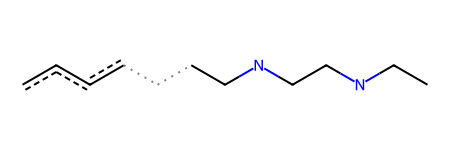

In [6]:
# A list of all our compounds

mols_list = Dataset["Structure"].tolist()

# res - the result (the maximum common substructure) [Calculation]

res = rdFMCS.FindMCS(mols_list)

maxcom = Chem.MolFromSmarts(res.smartsString)
print(res.smartsString)
display(maxcom)

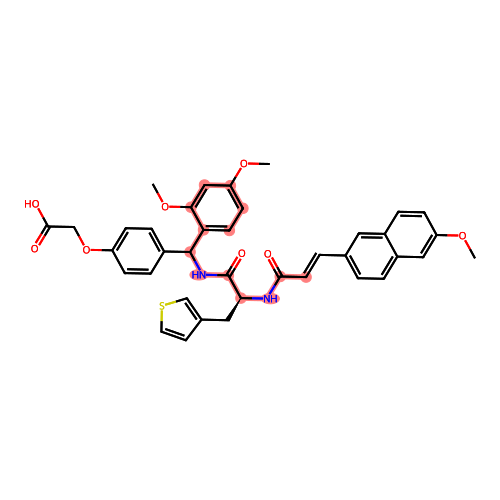

In [7]:
# Showing the MCS in the most active compound

compound = Chem.MolFromSmiles(Dataset["Standardized SMILES"][7])


hit_ats = list(compound.GetSubstructMatch(maxcom))
hit_bonds = []

for bond in maxcom.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(compound.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, compound, highlightAtoms=hit_ats,highlightBonds=hit_bonds)

d.DrawMolecule(compound)
d.FinishDrawing()
p = d.GetDrawingText()

i = IPython.display.SVG(p)
display(i)

with open("a7_MCS.svg", "w") as f:
    f.write(p)

### Finding similar compounds to our most active compound

Most active molecule (lowest IC50 value):
IC50 (µM): 3.9


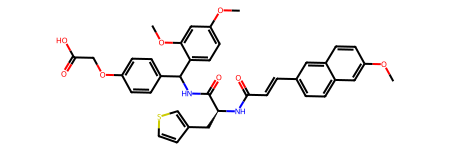

In [8]:
# Search for the most active compound (lower IC50)

# Convert 'IC50 (µM)' column to numeric
Dataset['IC50 (µM)'] = pd.to_numeric(Dataset['IC50 (µM)'], errors='coerce')

# Find the index of the row with the minimum IC50 value
index_of_most_active = Dataset['IC50 (µM)'].idxmin()

# Get the IC50 value of the most active molecule
ic50_value = Dataset.loc[index_of_most_active, 'IC50 (µM)']

# Get the structure of the most active molecule
structure = Dataset.loc[index_of_most_active, 'Structure']

print("Most active molecule (lowest IC50 value):")
print("IC50 (µM):", ic50_value)

#Save it as a SVG

Draw.MolToFile(structure,'a7.svg')
structure

In [125]:
# Showing all of our molecules in our dataset and save them

mols = [Chem.MolFromSmiles(smiles) for smiles in Dataset["Standardized SMILES"].values]
all = Draw.MolsToGridImage(mols, molsPerRow=5, useSVG=True)

# Convert the SVG object to a string
svg_content_all = all.data

# Write the SVG content to a file
with open("All.svg", "w") as f:
    f.write(svg_content_all)

In [69]:
# Getting our DrugBank database

DrugBank = pd.read_csv("DrugBank_curated_WithMorgan.csv")

# Iterating per SMILES and changing to MOL

DrugBank["MOL"] = [Chem.MolFromSmiles(smiles) for smiles in DrugBank["Standardized SMILES"].values]

In [71]:
# GetRDKitFPGenerator() - Generated integer identifiers such as Maximum path lengths, Hs paths, bond orders, size, etc

fpgen = AllChem.GetRDKitFPGenerator()
reference_a7 = fpgen.GetFingerprint(structure)

DrugBank["Tanimoto"] = [fpgen.GetFingerprint(mol) for mol in DrugBank["MOL"].values]

In [81]:
# Comparison between my most active compound and DrugBank compounds through Tanimoto Similarity

DrugBank["Similarity_A7"] = [DataStructs.TanimotoSimilarity(reference_a7,molecule)*100 for molecule in DrugBank["Tanimoto"].values]

In [91]:
# DataFrame with the ones that are most similar

similars = DrugBank[DrugBank["Similarity_A7"] >= 50][["Standardized SMILES", "Similarity_A7"]]
similars.to_csv("A7_Similars.csv")
similars

,Standardized SMILES,Similarity_A7
670,CN1CC(=O)N2[C@H](c3ccc4c(c3)OCO4)c3[nH]c4ccccc...,51.692308
1562,CC(=O)N[C@@H](Cc1ccc(P(=O)(O)O)c(P(=O)(O)O)c1)...,52.466667
3562,CC(=O)N[C@@H](Cc1ccc(OCC(=O)O)c(P(=O)(O)O)c1)C...,52.118644
10085,COc1cc(Cl)ccc1[C@H]1c2[nH]c3cccc(F)c3c2C2(CC2)...,50.622407


In [95]:
# Now I will use the most active standardized SMILES code's compound to look for similar compound in ChEMBL 
# (used directly the SMILES code of my most active compound) and the DrugBank (using Tanimoto's fingerprints)

# Most active compound:
Dataset[7:8]

,Name,Structure,SMILES,IC50 (µM),Active/Inactive,InChIKeys,Standardized SMILES,Morgan Fingerprints
7,a7,<rdkit.Chem.rdchem.Mol object at 0x000001A553C...,COC1=CC2=C(C=C1)C=C(C=C2)/C=C/C(=O)N[C@@H](CC3...,3.9,1.0,IYBCBYMTTDCPJQ-REZAJOPUSA-N,COc1ccc(C(NC(=O)[C@H](Cc2ccsc2)NC(=O)/C=C/c2cc...,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...


In [114]:
# After going to ChEMBL to get the most similar compounds (similarity > 40% using my SMILES):

ChEMBL = pd.read_csv("A7_Similars_ChEMBL.csv", delimiter=";")

# Standardization of SMILES

def standardize_molecules(smiles_list):
    unsalt = molvs.fragment.LargestFragmentChooser()
    s = Standardizer()
    u = molvs.charge.Uncharger()
    t = molvs.tautomer.TautomerCanonicalizer()
    std_smi = []
    inchik = []
    for smi in smiles_list:
        m = Chem.MolFromSmiles(smi)
        # step 1: sanitize, disconect metals, normalise chemotypes, reionise acids
        m = s.standardize(m)
        # step 2: disconect salts
        m = unsalt(m)
        # step 3: neutralise
        m = u.uncharge(m)
        inchik.append(Chem.MolToInchiKey(m))
        std_smi.append(Chem.MolToSmiles(m))
    return(inchik, std_smi)

# Applying to this database

inchikey,std_mols = standardize_molecules(ChEMBL["Smiles"])

# Adding to my dataframe

ChEMBL["InChIKeys"] = inchikey
ChEMBL["Standardized SMILES"] = std_mols

#Saving this data

ChEMBL.to_csv('ChEMBL_results_curated.csv', index=False)

In [115]:
ChEMBL

,Similarity,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,...,HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Np Likeness Score,Molecular Species,Molecular Formula,Smiles,Inchi Key,InChIKeys,Standardized SMILES
0,40.000001,CHEMBL489415,NaN,NaN,Small molecule,NaN,422.43,2,2,0.74,...,3,0,422.1689,0.15,ACID,C20H26N2O8,COC(=O)C(C)NC(=O)[C@H](CCC(=O)O)NC(=O)/C=C/c1c...,OQRMZSLHTNQGLS-DDQVESBOSA-N,OQRMZSLHTNQGLS-DDQVESBOSA-N,COC(=O)C(C)NC(=O)[C@H](CCC(=O)O)NC(=O)/C=C/c1c...
1,40.425533,CHEMBL1823963,NaN,NaN,Small molecule,NaN,529.56,7,9,5.40,...,2,2,529.1901,-0.43,ACID,C31H28FNO6,COc1ccc(/C=C/C(=O)NC(Cc2ccc3cc(OCc4ccccc4F)ccc...,GOFVWKFVLNCYPN-NTEUORMPSA-N,GOFVWKFVLNCYPN-NTEUORMPSA-N,COc1ccc(/C=C/C(=O)NC(Cc2ccc3cc(OCc4ccccc4F)ccc...
2,42.528737,CHEMBL3717584,NaN,NaN,Small molecule,NaN,550.66,2,3,5.32,...,2,2,550.2468,-0.35,NEUTRAL,C34H34N2O5,COc1ccc(/C=C/C(=O)N[C@@H](COCc2ccccc2)C(=O)NC(...,CTTLBTOARINAOQ-JRWLLCEYSA-N,CTTLBTOARINAOQ-JRWLLCEYSA-N,COc1ccc(/C=C/C(=O)N[C@@H](COCc2ccccc2)C(=O)NC(...
3,41.666666,CHEMBL2332241,NaN,NaN,Small molecule,NaN,356.38,5,5,1.65,...,4,0,356.1372,0.23,NEUTRAL,C19H20N2O5,COc1cc(/C=C/C(=O)NC(Cc2ccccc2)C(=O)NO)ccc1O,WTPRFHVTPIKAQA-CSKARUKUSA-N,WTPRFHVTPIKAQA-CSKARUKUSA-N,COc1cc(/C=C/C(=O)NC(Cc2ccccc2)C(=O)NO)ccc1O


In [123]:
# Let's see if the molecules are the same:

# DrugBank - with Tanimoto

tanimoto_similars = [Chem.MolFromSmiles(smiles) for smiles in similars["Standardized SMILES"].values]
tanimoto_similars_pics = Draw.MolsToGridImage(tanimoto_similars, useSVG=True)

# Convert the SVG object to a string
svg_content_tanimoto = tanimoto_similars_pics.data

# Write the SVG content to a file
with open("Similars_Tanimoto_DrugBank.svg", "w") as f:
    f.write(svg_content_tanimoto)

In [124]:
# ChEMBL - Probably a different similarity method

chembl_similars = [Chem.MolFromSmiles(smiles) for smiles in ChEMBL["Standardized SMILES"].values]
chembl_similars_pics = Draw.MolsToGridImage(chembl_similars, useSVG=True)

# Convert the SVG object to a string
svg_content_chembl = chembl_similars_pics.data

# Write the SVG content to a file
with open("Similars_ChEMBL.svg", "w") as f:
    f.write(svg_content_chembl)

In [118]:
# Totally different... Docking now?